### 1) Problem statement
- To enhance the success of email campaigns, we aim to predict the Click Through Rate (CTR). CTR is the ratio of users who clicked on a Call to Action (CTA) to the number of emails delivered. Our goal is to create a smart system that predicts CTR, helping the marketing team identify crucial factors for maximizing user engagement.

    Train and Test Set
    Train and Test set contains different sets of email campaigns containing information about the email campaign. Train set includes the target variable click_rate and you need to predict the click_rate of an email campaign in the test set.

    Variable - Description

    campaign_id - Unique identifier of a campaign

    sender - Sender of an e-mail

    subject_len - No. of characters in a subject

    body_len - No. of characters in an email body

    mean_paragraph_len - Average no. of characters in paragraph of an email

    day_of_week - Day on which email is sent

    is_weekend - Boolean flag indicating if an email is sent on weekend or not

    times_of_day - Times of day when email is sent: Morning, Noon, Evening

    category - Category of the product an email is related to

    product - Type of the product an email is related to

    no_of_CTA - No. of Call To Actions in an email

    mean_CTA_len - Average no. of characters in a CTA

    is_image - No. of images in an email

    is_personalised - Boolean flag indicating if an email is personalized to the user or not

    is_quote - No. of quotes in an email

    is_timer - Boolean flag indicating if an email contains a timer or not

    is_emoticons - No. of emoticons in an email

    is_discount - Boolean flag indicating if an email contains a discount or not

    is_price - Boolean flag indicating if an email contains price or not

    is_urgency - Boolean flag indicating if an email contains urgency or not

    target_audience - Cluster label of the target audience

    click_rate (Target Variable) - Click rate of an email campaign

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/code/parisrohan/click-through-rate-prediction/input

###  Import Data and Required Packages


####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [13]:
df_train=pd.read_csv('data/train_F3fUq2S.csv')
df_test=pd.read_csv('data/test_Bk2wfZ3.csv')

Show top 5 records

In [10]:
df_train.head(5)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [18]:
df_test.head(5)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set

### 3.1 Check Missing values

In [12]:
df_train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [14]:
df_test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

No null values in both test and train set

### 3.2 Check Duplicates

In [16]:
df_train.duplicated().sum()

0

In [17]:
df_test.duplicated().sum()

0

No duplicates in both train and test

### 3.3 Check data types

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaign_id         762 non-null    int64 
 1   sender              762 non-null    int64 
 2   subject_len         762 non-null    int64 
 3   body_len            762 non-null    int64 
 4   mean_paragraph_len  762 non-null    int64 
 5   day_of_week         762 non-null    int64 
 6   is_weekend          762 non-null    int64 
 7   times_of_day        762 non-null    object
 8   category            762 non-null    int64 
 9   product             762 non-null    int64 
 10  no_of_CTA           762 non-null    int64 
 11  mean_CTA_len        762 non-null    int64 
 12  is_image            762 non-null    int64 
 13  is_personalised     762 non-null    int64 
 14  is_quote            762 non-null    int64 
 15  is_timer            762 non-null    int64 
 16  is_emoticons        762 no

There is only one Categorical Column and rest are numerical columns in both test and train

### 3.4 Checking the number of unique values of each column

In [21]:
df_train.nunique()

campaign_id           1888
sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

In [22]:
df_test.nunique()

campaign_id           762
sender                 12
subject_len           129
body_len              697
mean_paragraph_len     83
day_of_week             7
is_weekend              2
times_of_day            3
category               16
product                39
no_of_CTA              25
mean_CTA_len           59
is_image                5
is_personalised         2
is_quote                6
is_timer                1
is_emoticons            7
is_discount             2
is_price                4
is_urgency              2
target_audience        16
dtype: int64

In [27]:
from scipy.stats import ks_2samp

# for field in fields_to_compare:
_, p_value = ks_2samp(df_train['subject_len'], df_test['subject_len'])
print(f"KS Test p-value for {'subject_len'}: {p_value}")


KS Test p-value for subject_len: 0.9621135293565316


### 3.5 Check statistics of data set

In [30]:
df_train['click_rate'].describe()

count    1888.000000
mean        0.041888
std         0.084223
min         0.000000
25%         0.005413
50%         0.010686
75%         0.035589
max         0.897959
Name: click_rate, dtype: float64

Max Click rate is 89% and Mean click rate 4.1%

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

In [47]:
distinct_values = df_train.loc[df_train['is_weekend'] == 1, 'day_of_week'].unique()
print(distinct_values)

[5 6]


5 and 6 indicate the weekend

<Axes: xlabel='is_weekend', ylabel='count'>

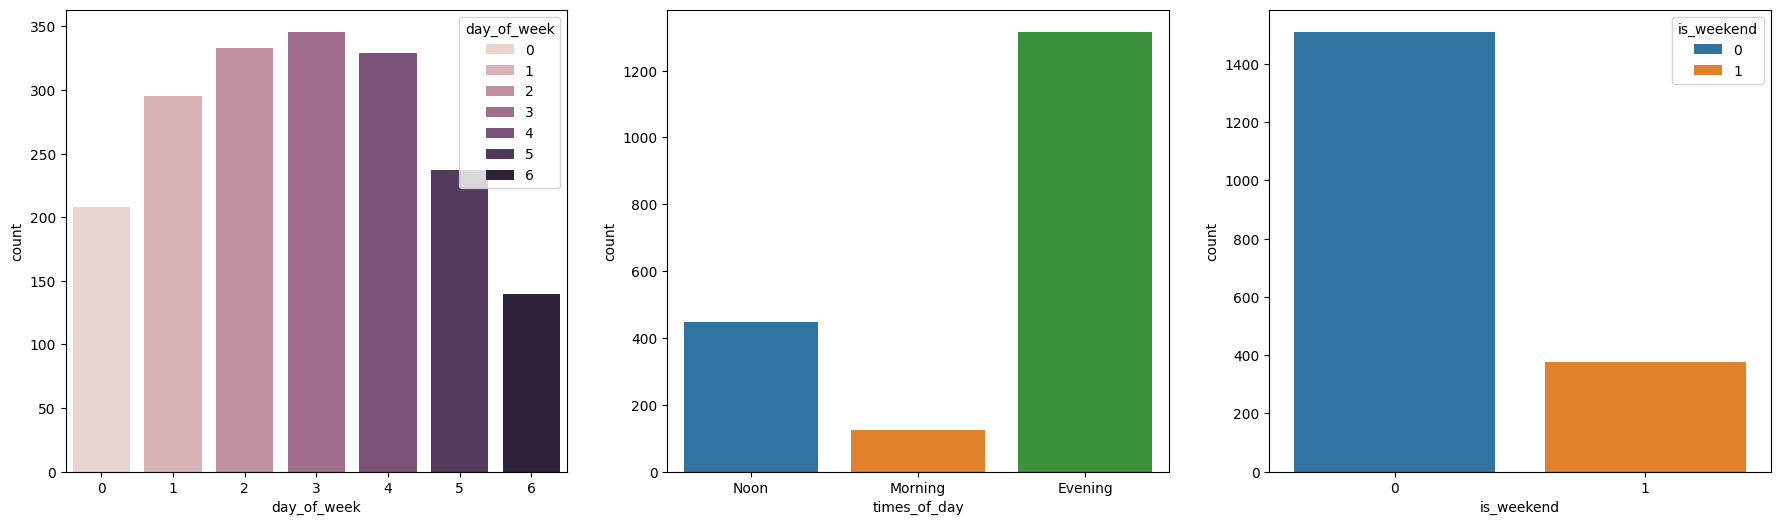

In [56]:
plt.figure(figsize=(22,6))

plt.subplot(131)
sns.countplot(df_train,x='day_of_week',hue='day_of_week')

plt.subplot(132)
sns.countplot(df_train,x='times_of_day',hue='times_of_day')

plt.subplot(133)
sns.countplot(df_train,x='is_weekend',hue='is_weekend')

Assume that the values 0-6 represent days from Sunday to Saturday. The majority of emails were sent on Wednesday, Tuesday, and Thursday. Additionally, a significant number of emails were sent during the evening, likely when people had more free time. If we categorize 0 as Not a Weekend and 1 as a Weekend, it's observed that most emails were sent on weekdays, with fewer emails sent on weekends.



<Axes: xlabel='is_emoticons', ylabel='count'>

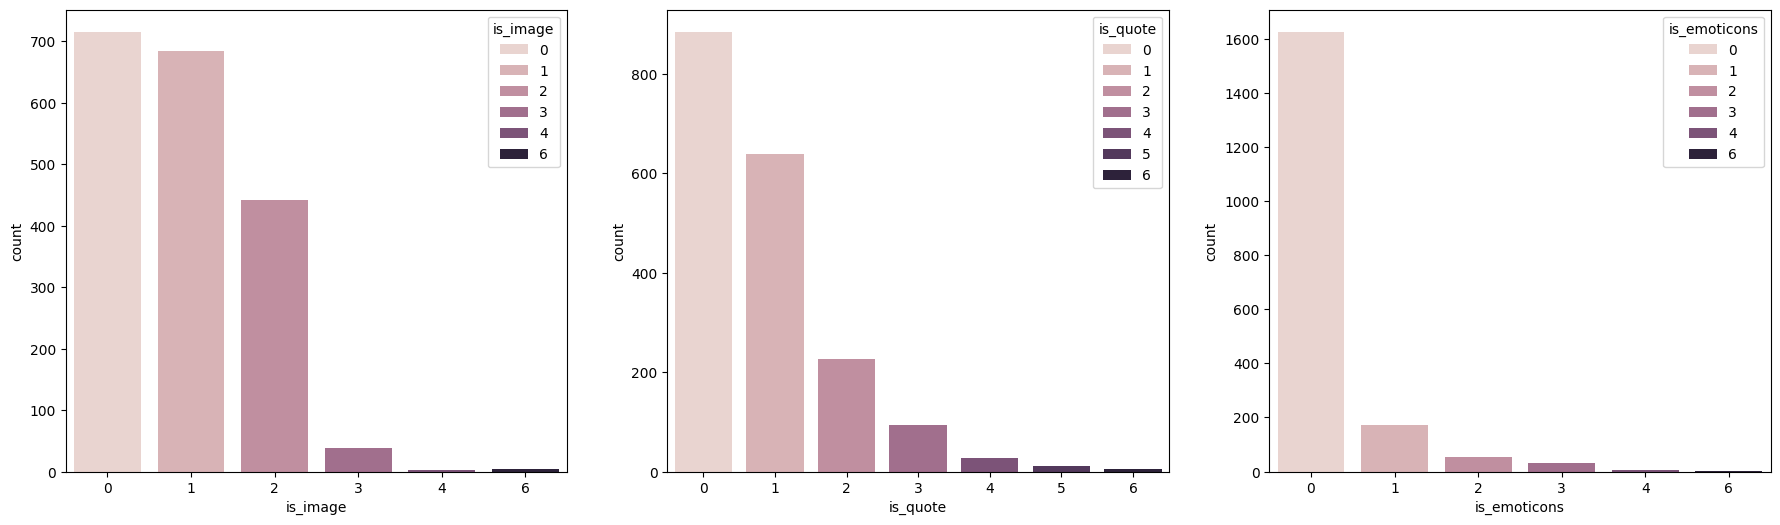

In [58]:
plt.figure(figsize=(22,6))

plt.subplot(131)
sns.countplot(df_train,x='is_image',hue='is_image')

plt.subplot(132)
sns.countplot(df_train,x='is_quote',hue='is_quote')

plt.subplot(133)
sns.countplot(df_train,x='is_emoticons',hue='is_emoticons')

Assuming that the numbers 0 to 6 represent the frequency of certain features in an email, we observe that emails with 0-2 images are more common compared to those with 3-6 images. Similarly, emails with 0-1 quotes are more prevalent, while those with 2-6 quotes are less frequent. Additionally, emails with 0 emojis are more widespread, with occurrences decreasing for emails containing 1-6 emojis.

